In [ ]:
# Problem Statements

'''

Consider the following “tweets” data set. https://drive.google.com/file/d/1DX03AMOu7putX2HaE0-
OCVbs-yHvK-zr/view?usp=drivesdk

This dataset has the tweets from an airline company. Perform the following activities given the
above dataset

1. Build a classification model using the airline_sentiment column as the target variable and
use the “text” column as the input text for the model

2. Perform the following preprocessing
    a. Clean the text
    b. Create Document term matrix using the TFIDFVectorizer
    c. Add additional variables or features from the dataset to improve the performance
    d. Perform lemmatisation or any other form of text cleansing
    e. Create a feature that counts the number of punctuation marks per each sentence
    f. Create a feature that counts the length of each tweet

3. Compute metrics such as precision recall and classification for all the three classes

4. Build a feed forward neural network that can perform multi class classification 

'''

'\n\nConsider the following “tweets” data set. https://drive.google.com/file/d/1DX03AMOu7putX2HaE0-\nOCVbs-yHvK-zr/view?usp=drivesdk\n\nThis dataset has the tweets from an airline company. Perform the following activities given the\nabove dataset\n\n1. Build a classification model using the airline_sentiment column as the target variable and\nuse the “text” column as the input text for the model\n\n2. Perform the following preprocessing\n    a. Clean the text\n    b. Create Document term matrix using the TFIDFVectorizer\n    c. Add additional variables or features from the dataset to improve the performance\n    d. Perform lemmatisation or any other form of text cleansing\n    e. Create a feature that counts the number of punctuation marks per each sentence\n    f. Create a feature that counts the length of each tweet\n\n3. Compute metrics such as precision recall and classification for all the three classes\n\n4. Build a feed forward neural network that can perform multi class classif

In [ ]:
# importing required libraries

import pandas as pd
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Loading the dataset

tweet = pd.read_csv('/content/Tweets.csv')
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# extracting the columns

tweet_columns = tweet.columns
tweet_columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# Dropping the columns which is less important

tweet.drop(labels=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis = 1, inplace=True)

In [ ]:
tweet.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
tweet.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

In [ ]:
# storing the columns into the separate variable to perform preprocessing and classification model

#  1. Build a classification model using the airline_sentiment column as the target variable and use the “text” column as the input text for the model

target = tweet['airline_sentiment']
sentences = tweet['text']

In [ ]:
# Creating function to clean the Text

from nltk.corpus.reader.tagged import word_tokenize

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def tokenize(t):
    return word_tokenize(t)


names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

# I thought the words related the name of airlines are not relevant to the sentiment analysis
# Therefore I decided to append the above names into the list of stop words.
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])


In [ ]:
# a. Clean the text

tweet['final_text'] = tweet.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
tweet['final_text'].head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: final_text, dtype: object

In [ ]:
for i in range(0, 10):
  print(" ".join(tweet.final_text[i]),'\n') # cleaned data after preprocessing

dhepburn said 

plus youve added commercials experience tacky 

didnt today must mean need take another trip 

really aggressive blast obnoxious entertainment guests faces amp little recourse 

really big bad thing 

seriously would pay seats didnt playing really bad thing flying va 

yes nearly every time fly vx ear worm wont go away 

really missed prime opportunity men without hats parody httpstcomwpggrezp 

well didntbut 

amazing arrived hour early youre good 



In [ ]:
tweet['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
for i in range(len(tweet)):
  tweet['final_text'][i] = " ".join(tweet['final_text'][i])

In [ ]:
tweet.head()

,airline_sentiment,text,final_text
0,neutral,@VirginAmerica What @dhepburn said.,dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,negative,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,negative,@VirginAmerica and it's a really big bad thing...,really big bad thing


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X = tweet.final_text


In [ ]:
tweet["airline_sentiment"].head()

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [ ]:
# using LabelEncoder for the "airline_sentiment" columns
encoder = LabelEncoder()
y = encoder.fit_transform(tweet["airline_sentiment"]) # neutral : 1, positive: 2, negative: 0

In [ ]:
print(X[:5], '\n', y[:5])

0                                        dhepburn said
1        plus youve added commercials experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: final_text, dtype: object 
 [1 2 1 0 0]


In [ ]:
c = CountVectorizer(min_df = 0.01)
X_countvec = c.fit_transform(X)

# b. Create Document term matrix using the TFIDFVectorizer

tf = TfidfVectorizer()
vectorized_data = tf.fit_transform(X)

In [ ]:
vectorized_data = vectorized_data.toarray()
vectorized_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# c. Add additional variables or features from the dataset to improve the performance
vectorized_data = pd.DataFrame(vectorized_data)

In [ ]:
# Splitting the dataset -- 'vectorized_data' using train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y, test_size=0.2, random_state=0)

In [ ]:
# Using RandomForestClassifier for the classification model
clf = RandomForestClassifier(random_state= 42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1870
           1       0.63      0.51      0.56       614
           2       0.77      0.54      0.63       444

    accuracy                           0.77      2928
   macro avg       0.74      0.65      0.69      2928
weighted avg       0.77      0.77      0.76      2928



In [ ]:
acc = accuracy_score(y_test, preds)
acc

0.7742486338797814

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def clean_text(text):
    doc = nlp(text)
    lemma_out = [token.lemma_ for token in doc]
    lemma_out = " ".join(lemma_out)
    return lemma_out

def number_punct(sent):
    doc = nlp(sent)
    puncts=[token for token in doc if token.is_punct==True ]
    return len(puncts)

def length_sentance(sent):
    doc = nlp(sent)
    tokens=[token for token in doc]
    return len(tokens)

In [ ]:
#  d. Perform lemmatisation or any other form of text cleansing
lemmatized_text = sentences.apply(lambda x: clean_text(x))

#  e. Create a feature that counts the number of punctuation marks per each sentence
a = sentences.apply(lambda x: number_punct(x)) 

#  f. Create a feature that counts the length of each tweet
b = sentences.apply(lambda x: length_sentance(x))

In [ ]:
1

1

# Feedforward Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Input
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train,X_test, Y_train,Y_test= train_test_split(vectorized_data, y, test_size=0.2,random_state=1)

In [ ]:
[X_train.shape,X_test.shape, Y_train.shape,Y_test.shape]

[(11712, 14399), (2928, 14399), (11712,), (2928,)]

In [ ]:
Y_train_cat=to_categorical(Y_train)
Y_test_cat=to_categorical(Y_test)

In [ ]:
model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train_cat,epochs=20,validation_data = (X_test, Y_test_cat))

Epoch 1/20
366/366 [==============================] - 5s 12ms/step - loss: 0.6085 - accuracy: 0.7528 - val_loss: 0.5260 - val_accuracy: 0.7883
Epoch 2/20
366/366 [==============================] - 4s 11ms/step - loss: 0.2734 - accuracy: 0.8970 - val_loss: 0.6242 - val_accuracy: 0.7722
Epoch 3/20
366/366 [==============================] - 4s 11ms/step - loss: 0.1308 - accuracy: 0.9542 - val_loss: 0.7999 - val_accuracy: 0.7736
Epoch 4/20
366/366 [==============================] - 4s 11ms/step - loss: 0.0706 - accuracy: 0.9754 - val_loss: 0.9398 - val_accuracy: 0.7688
Epoch 5/20
366/366 [==============================] - 4s 10ms/step - loss: 0.0417 - accuracy: 0.9860 - val_loss: 1.0724 - val_accuracy: 0.7609
Epoch 6/20
366/366 [==============================] - 5s 14ms/step - loss: 0.0285 - accuracy: 0.9915 - val_loss: 1.1177 - val_accuracy: 0.7633
Epoch 7/20
366/366 [==============================] - 4s 10ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 1.2558 - val_accuracy: 0.7712

In [ ]:
hist = pd.DataFrame(history.history)

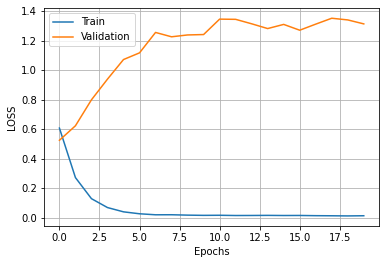

In [ ]:
import matplotlib.pyplot as plt

train_loss = hist["loss"]
val_loss = hist['val_loss']
plt.plot(train_loss)
plt.plot(val_loss)
# plt.ylim(20,120)
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()

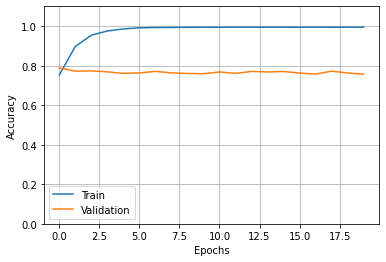

In [ ]:
train_accuracy = hist["accuracy"]
val_accuracy = hist['val_accuracy']
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.ylim(0,1.1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()